In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
df = pd.read_excel('data_full_sekres.xlsx')

In [3]:
#Sort by sum of power from low to high
df.sort_values(by='sumEngMdoPower' , inplace=True)

#write new column with sum of consumptions
df['sumEngMdoConsumption']=df['engMdoConsumption_0_']+df['engMdoConsumption_1_']+df['engMdoConsumption_2_']+df['engMdoConsumption_3_']

#Copy dataframe
df_min_max_scaled = df.copy()

#Mash together equal rows of power and take average consumption
df_min_max_scaled = df_min_max_scaled.groupby('sumEngMdoPower').mean().reset_index()

#normalize power
df_min_max_scaled['sumEngMdoPower'] = (df_min_max_scaled['sumEngMdoPower'] - df_min_max_scaled['sumEngMdoPower'].min()) / (7500 - df_min_max_scaled['sumEngMdoPower'].min())

df_min_max_scaled = df_min_max_scaled.groupby('sumEngMdoPower').mean().reset_index()

In [4]:
#display(df_min_max_scaled)

Text(0, 0.5, 'Consumption (liters/hour)')

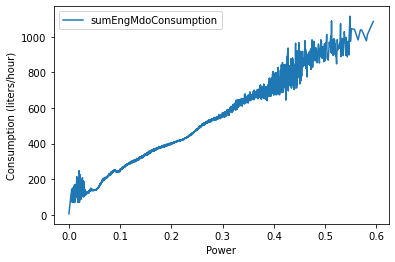

In [5]:
df_min_max_scaled.plot(x='sumEngMdoPower', y=['sumEngMdoConsumption'])
plt.xlabel('Power')
plt.ylabel('Consumption (liters/hour)')


## Repeat for each engine
Except 2 because it is not used

Text(0, 0.5, 'Fuel Consumption (liters/hour)')

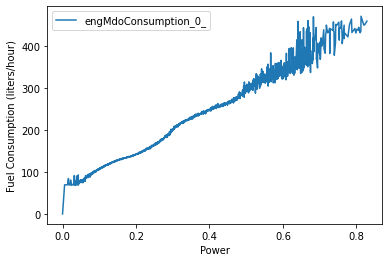

In [6]:
df_min_max_scaled_0_ = df.copy()

df_min_max_scaled_0_['engMdoPower_0_'] = (df_min_max_scaled_0_['engMdoPower_0_'] - df_min_max_scaled_0_['engMdoPower_0_'].min()) / (2500 - df_min_max_scaled_0_['engMdoPower_0_'].min())

df_min_max_scaled_0_ = df_min_max_scaled_0_.groupby('engMdoPower_0_').mean().reset_index()

df_min_max_scaled_0_.plot(x='engMdoPower_0_', y=['engMdoConsumption_0_'])
plt.xlabel('Power')
plt.ylabel('Fuel Consumption (liters/hour)')

Text(0, 0.5, 'Fuel Consumption (liters/hour)')

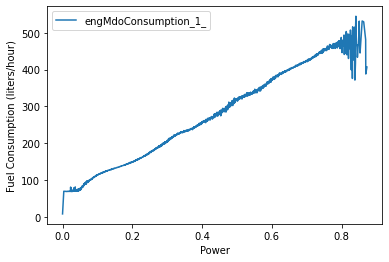

In [7]:
df_min_max_scaled_1_ = df.copy()

df_min_max_scaled_1_['engMdoPower_1_'] = (df_min_max_scaled_1_['engMdoPower_1_'] - df_min_max_scaled_1_['engMdoPower_1_'].min()) / (2500 - df_min_max_scaled_1_['engMdoPower_1_'].min())

df_min_max_scaled_1_ = df_min_max_scaled_1_.groupby('engMdoPower_1_').mean().reset_index()

df_min_max_scaled_1_.plot(x='engMdoPower_1_', y=['engMdoConsumption_1_'])
plt.xlabel('Power')
plt.ylabel('Fuel Consumption (liters/hour)')

Text(0, 0.5, 'Fuel Consumption (liters/hour)')

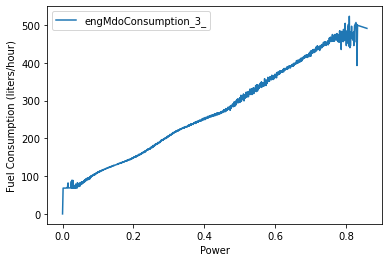

In [8]:
df_min_max_scaled_3_ = df.copy()

df_min_max_scaled_3_['engMdoPower_3_'] = (df_min_max_scaled_3_['engMdoPower_3_'] - df_min_max_scaled_3_['engMdoPower_3_'].min()) / (2500 - df_min_max_scaled_3_['engMdoPower_3_'].min())

df_min_max_scaled_3_ = df_min_max_scaled_3_.groupby('engMdoPower_3_').mean().reset_index()

df_min_max_scaled_3_.plot(x='engMdoPower_3_', y=['engMdoConsumption_3_'])
plt.xlabel('Power')
plt.ylabel('Fuel Consumption (liters/hour)')

# Efficiency calculations

Energy density of diesel is 10.93 kWh/l
Consumption multiplied by energy density is the theoretical output (l/h * kWh/l = kW)

Text(0, 0.5, 'Efficiency')

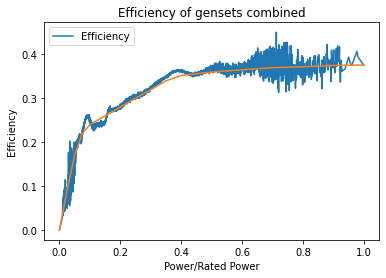

In [6]:
#Copy dataframe
df_eff = df.copy()

#Mash together equal rows of power and take average consumption
df_eff = df_eff.groupby('sumEngMdoPower').mean().reset_index()

#Multiplying consumption by 10.93 gives max theoretical output
df_eff['sumMaxTheoreticPower'] = df_eff['sumEngMdoConsumption']*10.93

#Efficiency is theoretic max divided by actual
df_eff["Efficiency"] = df_eff['sumEngMdoPower']/df_eff['sumMaxTheoreticPower']

#normalize power
df_eff['sumEngMdoPower'] = (df_eff['sumEngMdoPower'] - df_eff['sumEngMdoPower'].min()) / (df_eff['sumEngMdoPower'].max() - df_eff['sumEngMdoPower'].min())

# Aggregate rows together by 100
#N = len(df_eff.index)
#N = int(N)
#df_eff['group'] = list(itertools.chain.from_iterable([x]*18 for x in range(0, int(N/18))))
           
#df_eff = df_eff.groupby('group').mean().reset_index()
#display(df_eff)


testx = [0,0.025,0.05,0.075,0.1,0.2,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9,1]
testy = [0,0.09,0.17,0.22,0.24,0.28,0.32,0.34,0.352,0.36,0.365,0.37,0.372,0.375,0.376]
x_t = testx
y_t = testy
                       
#plot
df_eff.plot(x='sumEngMdoPower', y=['Efficiency'], title='Efficiency of gensets combined')
plt.plot(x_t,y_t)
plt.xlabel('Power/Rated Power')
plt.ylabel('Efficiency')



# Create better line to represent efficiency

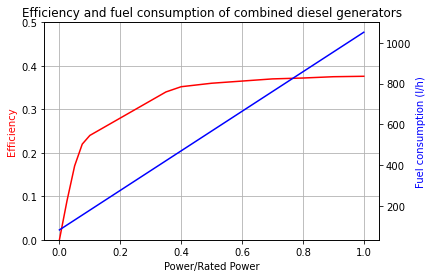

0.36793943966007775


In [24]:
x = df_eff['sumEngMdoPower']
y1 = df_eff['Efficiency']
y2 = df_eff['sumEngMdoConsumption']

testx = [0,0.025,0.05,0.075,0.1,0.2,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9,1]
testy = [0,0.09,0.17,0.22,0.24,0.28,0.32,0.34,0.352,0.36,0.365,0.37,0.372,0.375,0.376]
x_t = testx
y_t = testy

x_half = [0.5, 1]
y_half = [0.36793943966007775, 0.376]

#Polyreg og efficiency
mymodel = np.poly1d(np.polyfit(x, y1, 7))

myline = np.linspace(0, 0.5, 50)

#linreg of consumption
mymodel_m = np.poly1d(np.polyfit(x, y2, 1))

myline_m = np.linspace(0, 1, 50)

#draw figure
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
#ax1.plot(myline,mymodel(myline),'r')
#ax1.plot(x_half, y_half, 'r')
ax1.plot(x_t, y_t, 'r')
ax2.plot(myline_m,mymodel_m(myline_m),'b')


ax1.set_xlabel('Power/Rated Power')
ax1.set_ylabel('Efficiency', color='r')
ax2.set_ylabel('Fuel consumption (l/h)', color='b')
ax1.set_ylim(0,0.5)
ax1.grid()
ax1.set_title('Efficiency and fuel consumption of combined diesel generators')

plt.show() 

start = np.polyval(mymodel,0.5)
print(start)

Text(0, 0.5, 'Efficiency')

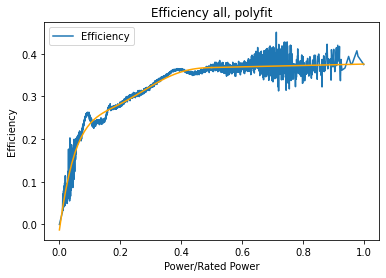

In [23]:
df_eff.plot(x='sumEngMdoPower', y=['Efficiency'], title='Efficiency all, polyfit')
plt.plot(x_half,y_half,'orange')
plt.plot(myline,mymodel(myline),'orange')
plt.xlabel('Power/Rated Power')
plt.ylabel('Efficiency')

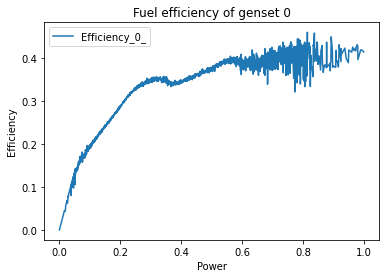

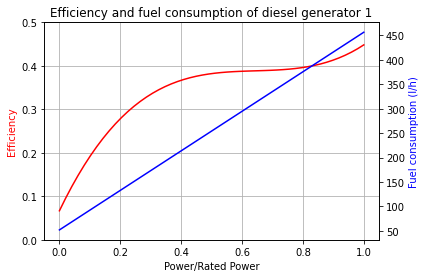

In [7]:
#Copy dataframe
df_eff_0_= df.copy()

#Mash together equal rows of power and take average consumption
df_eff_0_ = df_eff_0_.groupby('engMdoPower_0_').mean().reset_index()

#Multiplying consumption by 10.93 gives max theoretical output
df_eff_0_['MaxTheoreticPower_0_'] = df_eff_0_['engMdoConsumption_0_']*10.93

#Efficiency is theoretic max divided by actual
df_eff_0_['Efficiency_0_'] = df_eff_0_['engMdoPower_0_']/df_eff_0_['MaxTheoreticPower_0_']

#normalize power. RATED IS 2100 kW
df_eff_0_['engMdoPower_0_'] = (df_eff_0_['engMdoPower_0_'] - df_eff_0_['engMdoPower_0_'].min()) / (df_eff_0_['engMdoPower_0_'].max() - df_eff_0_['engMdoPower_0_'].min())

#plot
df_eff_0_.plot(x='engMdoPower_0_', y=['Efficiency_0_'], title = 'Fuel efficiency of genset 0')
plt.xlabel('Power')
plt.ylabel('Efficiency')

x = df_eff_0_['engMdoPower_0_']
y1 = df_eff_0_['Efficiency_0_']
y2 = df_eff_0_['engMdoConsumption_0_']


#Polyreg og efficiency
mymodel_0 = np.poly1d(np.polyfit(x, y1, 3))

myline_0 = np.linspace(0, 1, 50)

#linreg of consumption
mymodel_01 = np.poly1d(np.polyfit(x, y2, 1))

myline_01 = np.linspace(0, 1, 50)

#draw figure
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(myline_0,mymodel_0(myline_0),'r')
ax2.plot(myline_01,mymodel_01(myline_01),'b')


ax1.set_xlabel('Power/Rated Power')
ax1.set_ylabel('Efficiency', color='r')
ax2.set_ylabel('Fuel consumption (l/h)', color='b')
ax1.set_ylim(0,0.5)
ax1.grid()
ax1.set_title('Efficiency and fuel consumption of diesel generator 1')

plt.show() 


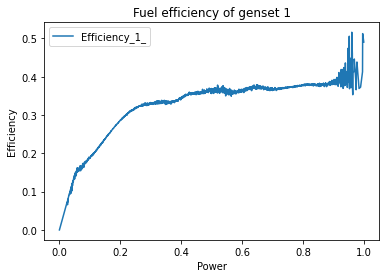

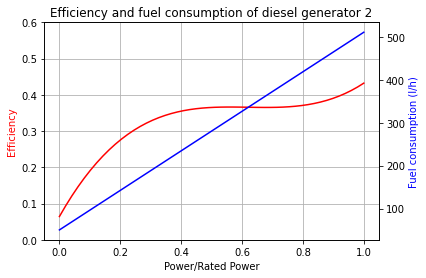

In [8]:
#Copy dataframe
df_eff_1_= df.copy()

#Mash together equal rows of power and take average consumption
df_eff_1_ = df_eff_1_.groupby('engMdoPower_1_').mean().reset_index()

#Multiplying consumption by 10.93 gives max theoretical output
df_eff_1_['MaxTheoreticPower_1_'] = df_eff_1_['engMdoConsumption_1_']*10.93

#Efficiency is theoretic max divided by actual
df_eff_1_['Efficiency_1_'] = df_eff_1_['engMdoPower_1_']/df_eff_1_['MaxTheoreticPower_1_']

#normalize power
df_eff_1_['engMdoPower_1_'] = (df_eff_1_['engMdoPower_1_'] - df_eff_1_['engMdoPower_1_'].min()) / (df_eff_1_['engMdoPower_1_'].max() - df_eff_1_['engMdoPower_1_'].min())

#plot
df_eff_1_.plot(x='engMdoPower_1_', y=['Efficiency_1_'], title = 'Fuel efficiency of genset 1')
plt.xlabel('Power')
plt.ylabel('Efficiency')

x = df_eff_1_['engMdoPower_1_']
y1 = df_eff_1_['Efficiency_1_']
y2 = df_eff_1_['engMdoConsumption_1_']


#Polyreg og efficiencygit 
mymodel_1 = np.poly1d(np.polyfit(x, y1, 3))

myline_1 = np.linspace(0, 1, 50)

#linreg of consumption
mymodel_11 = np.poly1d(np.polyfit(x, y2, 1))

myline_11 = np.linspace(0, 1, 50)

#draw figure
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(myline_1,mymodel_1(myline_1),'r')
ax2.plot(myline_11,mymodel_11(myline_11),'b')


ax1.set_xlabel('Power/Rated Power')
ax1.set_ylabel('Efficiency', color='r')
ax2.set_ylabel('Fuel consumption (l/h)', color='b')
ax1.set_ylim(0,0.6)
ax1.grid()
ax1.set_title('Efficiency and fuel consumption of diesel generator 2')

plt.show() 


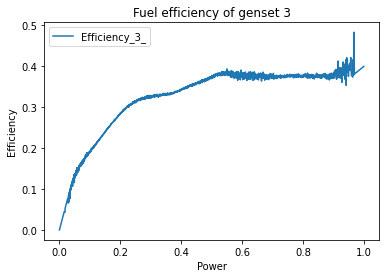

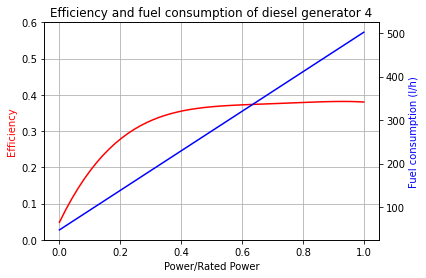

In [9]:
#Copy dataframe
df_eff_3_= df.copy()

#Mash together equal rows of power and take average consumption
df_eff_3_ = df_eff_3_.groupby('engMdoPower_3_').mean().reset_index()

#Multiplying consumption by 10.93 gives max theoretical output
df_eff_3_['MaxTheoreticPower_3_'] = df_eff_3_['engMdoConsumption_3_']*10.93

#Efficiency is theoretic max divided by actual
df_eff_3_['Efficiency_3_'] = df_eff_3_['engMdoPower_3_']/df_eff_3_['MaxTheoreticPower_3_']

#normalize power
df_eff_3_['engMdoPower_3_'] = (df_eff_3_['engMdoPower_3_'] - df_eff_3_['engMdoPower_3_'].min()) / (df_eff_3_['engMdoPower_3_'].max() - df_eff_3_['engMdoPower_3_'].min())

#plot
df_eff_3_.plot(x='engMdoPower_3_', y=['Efficiency_3_'], title = 'Fuel efficiency of genset 3')
plt.xlabel('Power')
plt.ylabel('Efficiency')

x = df_eff_3_['engMdoPower_3_']
y1 = df_eff_3_['Efficiency_3_']
y2 = df_eff_3_['engMdoConsumption_3_']


#Polyreg og efficiency
mymodel_3 = np.poly1d(np.polyfit(x, y1, 4))

myline_3 = np.linspace(0, 1, 50)

#linreg of consumption
mymodel_31 = np.poly1d(np.polyfit(x, y2, 1))

myline_31 = np.linspace(0, 1, 50)

#draw figure
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(myline_3,mymodel_3(myline_3),'r')
ax2.plot(myline_31,mymodel_31(myline_31),'b')


ax1.set_xlabel('Power/Rated Power')
ax1.set_ylabel('Efficiency', color='r')
ax2.set_ylabel('Fuel consumption (l/h)', color='b')
ax1.set_ylim(0,0.6)
ax1.grid()
ax1.set_title('Efficiency and fuel consumption of diesel generator 4')

plt.show() 